In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:

with open("../output/"+"test_losses.pkl", "rb") as f:
    test_losses = pickle.load(f)

with open("../output/"+"train_losses.pkl", "rb") as f:
    train_losses = pickle.load(f)

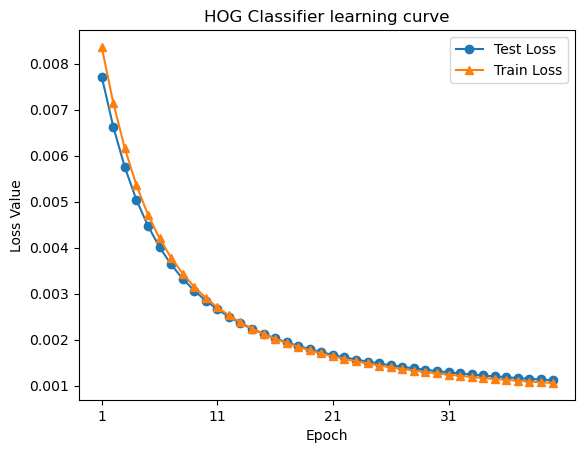

In [3]:
plt.title("HOG Classifier learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

plt.plot(range(1,len(test_losses)+1),test_losses,marker='o', label="Test Loss")
plt.plot(range(1,len(test_losses)+1),train_losses,marker='^', label="Train Loss")
plt.xticks(range(1,len(test_losses)+1, 10))

plt.legend(loc="upper right")


In [4]:
with open("../output/"+"total_pred.pkl", "rb") as f:
    total_pred = pickle.load(f)

with open("../output/"+"total_labels.pkl", "rb") as f:
    total_labels = pickle.load(f)

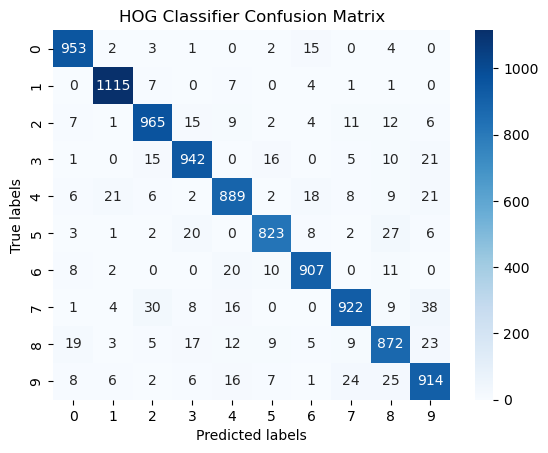

In [5]:

cm = confusion_matrix(total_labels, total_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('HOG Classifier Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

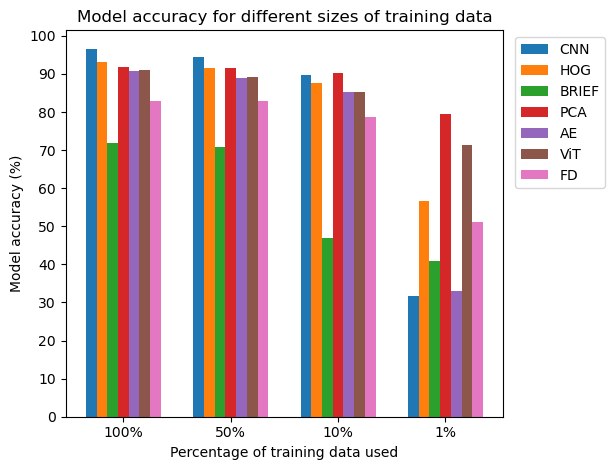

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data
cnn = [96.62, 94.38, 89.64, 31.72]
hog = [93.02, 91.54, 87.52, 56.69]
brief = [71.83, 70.86, 46.91, 40.93]
pca = [91.77, 91.65, 90.22, 79.52]
ae = [90.83, 88.86, 85.3, 33.03]
vit = [90.92, 89.29, 85.35, 71.33]
fd = [83.01, 82.77, 78.60, 51.25]

# X positions
x = np.arange(4)
width = 0.1

# Plotting bars
plt.bar(x - 3 * width, cnn, width, label='CNN')
plt.bar(x - 2 * width, hog, width, label='HOG')
plt.bar(x - width, brief, width, label='BRIEF')
plt.bar(x, pca, width, label='PCA')
plt.bar(x + width, ae, width, label='AE')
plt.bar(x + 2 * width, vit, width, label='ViT')
plt.bar(x + 3 * width, fd, width, label='FD')

# Customizing x-axis labels
plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("Model accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

# Adding legend and layout adjustments
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()



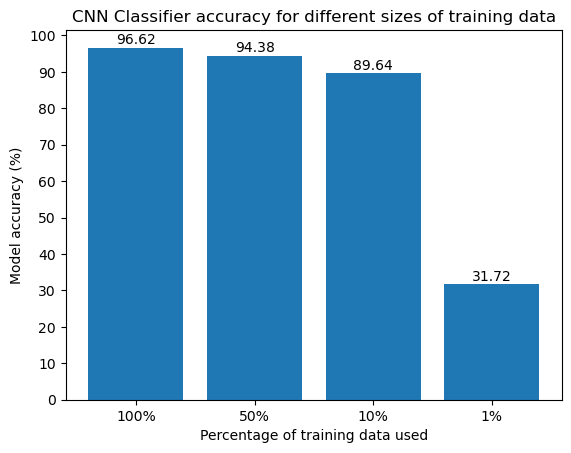

In [7]:
plt.bar(x, cnn)

for i, value in enumerate(cnn):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("CNN Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

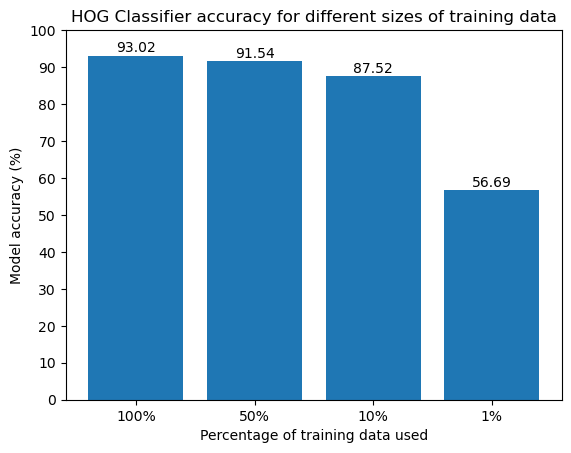

In [8]:
plt.bar(x, hog)

for i, value in enumerate(hog):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("HOG Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

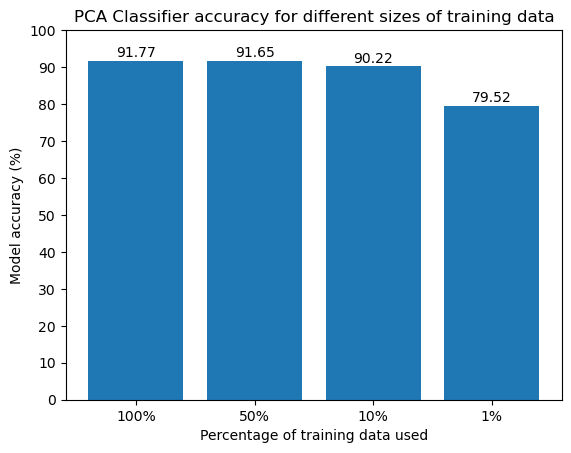

In [9]:
plt.bar(x, pca)

for i, value in enumerate(pca):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("PCA Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

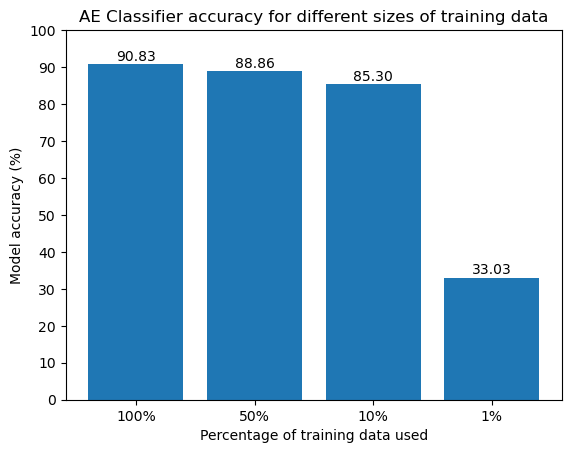

In [10]:
plt.bar(x, ae)

for i, value in enumerate(ae):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("AE Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

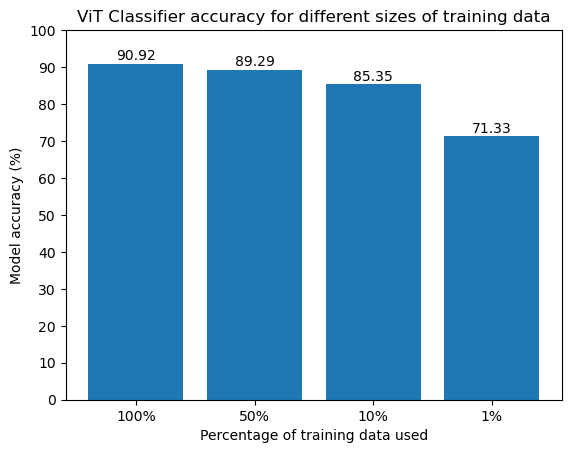

In [11]:
plt.bar(x, vit)

for i, value in enumerate(vit):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("ViT Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

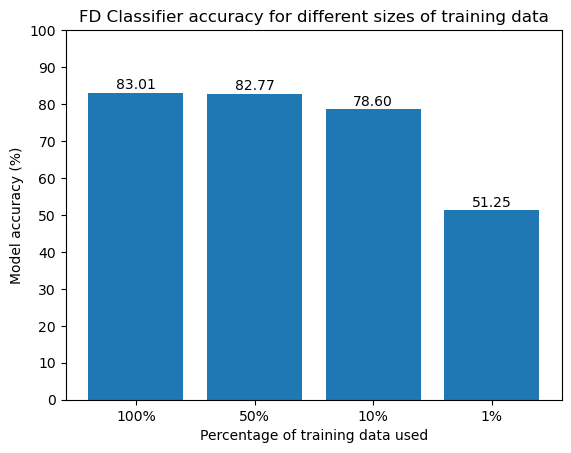

In [12]:
plt.bar(x, fd)

for i, value in enumerate(fd):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("FD Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

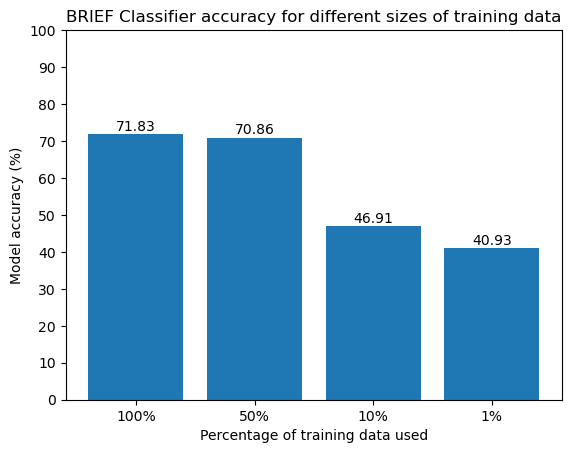

In [13]:
plt.bar(x, brief)

for i, value in enumerate(brief):
    plt.text(x[i], value + 1, f"{value:.2f}", ha='center')

plt.xticks(x, ['100%', '50%', '10%', '1%'])
plt.yticks(range(0,101,10))

plt.title("BRIEF Classifier accuracy for different sizes of training data")

plt.ylabel('Model accuracy (%)')
plt.xlabel('Percentage of training data used')

plt.show()

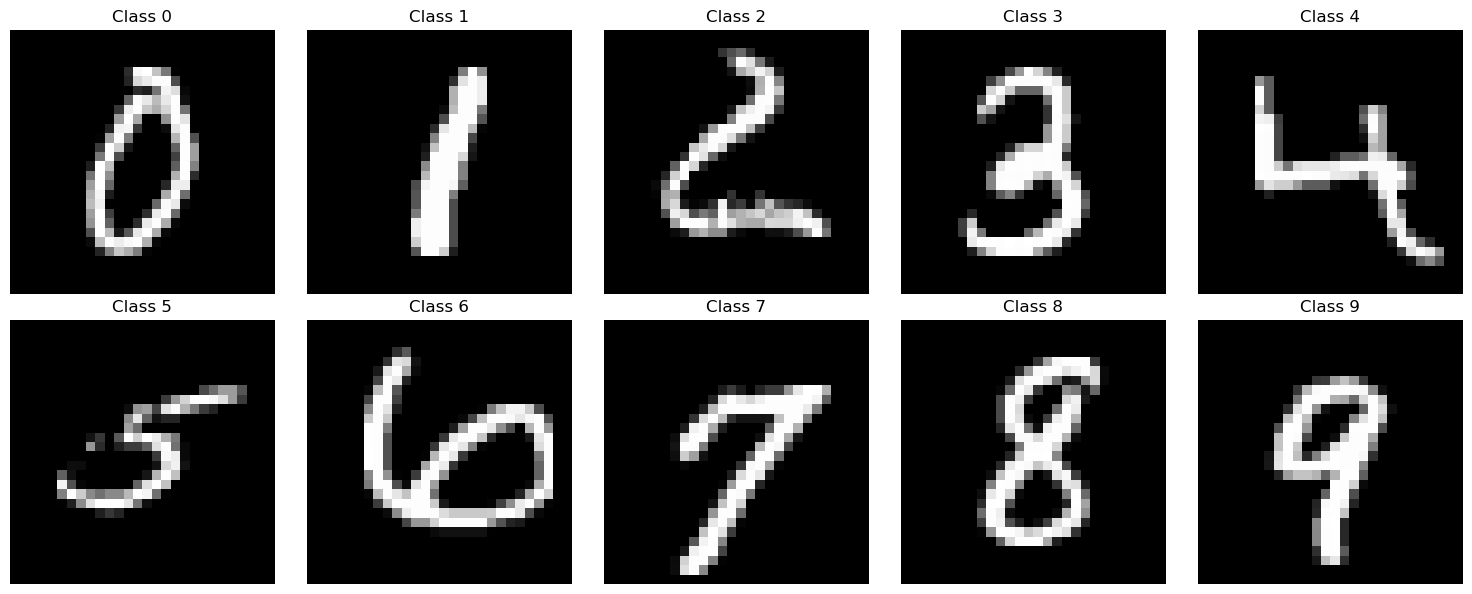

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

# Create a figure with 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Loop through each class and display a sample image
for i in range(10):
    # Get a sample image from the current class
    for img, label in trainloader:
        if label.item() == i:
            sample_img = img.squeeze(0).numpy().reshape(28, 28)
            break

    # Display the sample image
    axs[i // 5, i % 5].imshow(sample_img, cmap='gray')
    axs[i // 5, i % 5].set_title(f"Class {i}")
    axs[i // 5, i % 5].axis('off')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()